<a href="https://colab.research.google.com/github/SunYutongAmber/portfolio/blob/main/Problem_set2/code/Process_Cryptopunk_Data_Prepare_X_and_Y_for_Classification_and_Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/


# Part I: Import and Inspect Data

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv('https://github.com/SunYutongAmber/portfolio/blob/main/Problem_set2/data/queried_cryptopunks_data.csv', on_bad_lines='skip')
#df = pd.read_csv('https://github.com/SunYutongAmber/portfolio/blob/main/Problem_set2/data/queried_cryptopunks_data.csv',index_col="Unnamed: 0")
#df = pd.read_csv('https://github.com/SunYutongAmber/portfolio/blob/main/Problem_set2/data/queried_cryptopunks_data.csv', error_bad_lines=False)
df = pd.read_csv('/content/queried_cryptopunks_data.csv',index_col="Unnamed: 0")
df=df.dropna()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part II: Prepare the Y varible for Regression

## 2.1. Write functions to calculte the Y variable for Regression 

*(skip the step if the Y variable already exists)*

## 2.2. Make Sure that the Data Type of Y is "numeric"

In [4]:
df.dtypes

timestamp     object
eth          float64
dtype: object

In [5]:
df['eth'] = pd.to_numeric(df['eth'])
df.dtypes

timestamp     object
eth          float64
dtype: object

# Part III: Prepare the Y variable for Classification

reference:

https://datatofish.com/if-condition-in-pandas-dataframe/ *italicized text*

In [6]:
#@title Define the Congestion Threshold
cut = 65 #@param {type:"number"}


According to the distribution of the crptopunk price data, we set the cut as 65. For price larger than or equal to 65, we set it as high price. For price smaller than 65, we set it as low price.

In [7]:
print(min(df['eth']))
print(max(df['eth']))
print(np.mean(df['eth']))

0.0
450.0
29.777748293967374


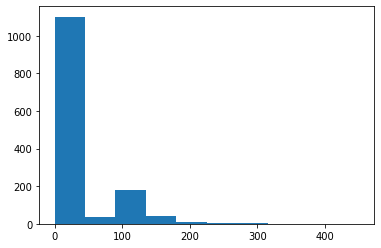

In [8]:
plt.hist(df["eth"])
plt.show()

## 3.1. Method 1: If function

In [9]:
df['high_price'] = df['eth'] >= cut
df.head()

,timestamp,eth,high_price
0,6/23/17 0:00,0.154500,False
1,6/24/17 0:00,0.194091,False
2,6/25/17 0:00,0.138462,False
3,6/26/17 0:00,0.135556,False
4,6/27/17 0:00,0.222222,False


In [10]:
df.loc[(df['eth'] >= cut), 'high_price'] = 1
df.loc[(df['eth'] < cut), 'high_price'] = 0
df

,timestamp,eth,high_price
0,6/23/17 0:00,0.154500,0
1,6/24/17 0:00,0.194091,0
2,6/25/17 0:00,0.138462,0
3,6/26/17 0:00,0.135556,0
4,6/27/17 0:00,0.222222,0
...,...,...,...
1741,10/6/21 18:57,148.450000,1
1743,10/7/21 0:27,160.000000,1
1747,10/7/21 6:13,125.000000,1
1751,10/7/21 11:28,120.000000,1


## 3.2. Method 2: Lambda function

notes: the best method that I suggest

In [11]:
#df['high_price'] = df['eth'].apply(lambda x: 1 if x>= cut else 0)
#df.head()

## 3.3. Method 3: Cut function

reference: 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

notes: I do not suggest this method if you are newbies to data science 

In [12]:
df.head()

,timestamp,eth,high_price
0,6/23/17 0:00,0.154500,0
1,6/24/17 0:00,0.194091,0
2,6/25/17 0:00,0.138462,0
3,6/26/17 0:00,0.135556,0
4,6/27/17 0:00,0.222222,0


In [13]:
#import numpy as np
#congested = pd.cut(df['theta'], bins=[0,0.95,1], labels=[0,1]) #might have problems at boundaries
#df.insert(3, 'congested2',congested)
#df.head()

In [14]:
#import numpy as np
#congested = pd.cut(df['theta'], bins=[-1,0.95,2], labels=[0,1]) #avoid the boundary problems
#df.insert(3, 'congested3',congested)
#df.head()

# Part IV: Create the X variables

## 4.1. Shift the Y to get past values

reference:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [15]:
# generate a new variable as the previous 1 observable of your Y variable for regression
df['eth_past'] = df['eth'].shift(1)
df

,timestamp,eth,high_price,eth_past
0,6/23/17 0:00,0.154500,0,NaN
1,6/24/17 0:00,0.194091,0,0.154500
2,6/25/17 0:00,0.138462,0,0.194091
3,6/26/17 0:00,0.135556,0,0.138462
4,6/27/17 0:00,0.222222,0,0.135556
...,...,...,...,...
1741,10/6/21 18:57,148.450000,1,137.950000
1743,10/7/21 0:27,160.000000,1,148.450000
1747,10/7/21 6:13,125.000000,1,160.000000
1751,10/7/21 11:28,120.000000,1,125.000000


## 4.2. Calculate the Moving Averages

references: 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

https://towardsdatascience.com/moving-averages-in-python-16170e20f6c

In [16]:
#@title Define the Window
window = 10 #@param {type:"number"}


In [17]:
df['eth_past_average10']=df['eth_past'].rolling(window=window,min_periods=1).mean()
df.head(20)

,timestamp,eth,high_price,eth_past,eth_past_average10
0,6/23/17 0:00,0.154500,0,NaN,NaN
1,6/24/17 0:00,0.194091,0,0.154500,0.154500
2,6/25/17 0:00,0.138462,0,0.194091,0.174295
3,6/26/17 0:00,0.135556,0,0.138462,0.162351
4,6/27/17 0:00,0.222222,0,0.135556,0.155652
5,6/28/17 0:00,0.287368,0,0.222222,0.168966
6,6/29/17 0:00,0.188571,0,0.287368,0.188700
7,6/30/17 0:00,0.286957,0,0.188571,0.188681
8,7/1/17 0:00,1.189167,0,0.286957,0.200966
9,7/2/17 0:00,0.329677,0,1.189167,0.310766


# Part V Train and Test Split

*reference*:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

In [18]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [19]:
# change the train and test split parameters 
tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

In [20]:
for train_idx, test_idx in tss.split(df):
    print("TRAIN:", train_idx, "TEST:", test_idx)

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [21]:
train_idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [22]:
test_idx

array([ 920,  921,  922,  923,  924,  925,  926,  927,  928,  929,  930,
        931,  932,  933,  934,  935,  936,  937,  938,  939,  940,  941,
        942,  943,  944,  945,  946,  947,  948,  949,  950,  951,  952,
        953,  954,  955,  956,  957,  958,  959,  960,  961,  962,  963,
        964,  965,  966,  967,  968,  969,  970,  971,  972,  973,  974,
        975,  976,  977,  978,  979,  980,  981,  982,  983,  984,  985,
        986,  987,  988,  989,  990,  991,  992,  993,  994,  995,  996,
        997,  998,  999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007,
       1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018,
       1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029,
       1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040,
       1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051,
       1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062,
       1063, 1064, 1065, 1066, 1067, 1068, 1069, 10

In [23]:
train_df = df.filter(items=train_idx, axis=0)
test_df =  df.filter(items=test_idx, axis=0)

In [24]:
train_df.head()

,timestamp,eth,high_price,eth_past,eth_past_average10
0,6/23/17 0:00,0.154500,0,NaN,NaN
1,6/24/17 0:00,0.194091,0,0.154500,0.154500
2,6/25/17 0:00,0.138462,0,0.194091,0.174295
3,6/26/17 0:00,0.135556,0,0.138462,0.162351
4,6/27/17 0:00,0.222222,0,0.135556,0.155652


In [25]:
test_df

,timestamp,eth,high_price,eth_past,eth_past_average10
920,11/4/20 0:00,4.490000,0,16.750000,12.064125
921,11/5/20 0:00,3.500000,0,4.490000,12.065625
922,11/6/20 0:00,3.450000,0,3.500000,11.927292
923,11/7/20 0:00,5.214286,0,3.450000,11.727667
925,11/9/20 0:00,6.000000,0,5.214286,11.482429
...,...,...,...,...,...
1374,9/24/21 23:07,120.220000,1,108.500000,114.700500
1375,9/25/21 0:00,138.373333,1,120.220000,115.922500
1376,9/25/21 0:00,102.000000,1,138.373333,116.859833
1377,9/25/21 0:16,105.000000,1,102.000000,115.171833


# Part VI Prepare the Train and Test Data for Classification and Regression

## 6.1. Classification

### 6.1.1 Define the columns (Y, X) for Classification 

In [26]:
cols_C = ['high_price','eth_past_average10']

### 6.1.2 Define the Data Frame of Train and Test Data for Classification

In [27]:
df_C_train = train_df[cols_C]
df_C_test = test_df[cols_C]

### 6.1.3 Export the Train and Test Data for Classification

In [28]:
df_C_train.head()

,high_price,eth_past_average10
0,0,NaN
1,0,0.154500
2,0,0.174295
3,0,0.162351
4,0,0.155652


In [29]:
df_C_train.to_csv('Classification_Train.csv')

In [30]:
df_C_test.head()

,high_price,eth_past_average10
920,0,12.064125
921,0,12.065625
922,0,11.927292
923,0,11.727667
925,0,11.482429


In [31]:
df_C_test.to_csv('Classification_Test.csv')

## 6.2 Regression

### 6.2.1. Define the columns (Y, X) for Regression

In [39]:
cols_R = ['high_price','eth_past_average10']

### 6.2.2. Define the Data Frame of Train and Test Data for Regression

In [40]:
df_R_train = train_df[cols_R]
df_R_test = test_df[cols_R]

### 6.2.3. Export the Train and Test Data for Regression

In [41]:
df_R_train.head()

,high_price,eth_past_average10
0,0,NaN
1,0,0.154500
2,0,0.174295
3,0,0.162351
4,0,0.155652


In [42]:
df_R_train.to_csv('Regression_Train_Cryptopunks.csv')

In [43]:
df_R_test.head()

,high_price,eth_past_average10
920,0,12.064125
921,0,12.065625
922,0,11.927292
923,0,11.727667
925,0,11.482429


In [44]:
df_R_test.to_csv('Regression_Test_Cryptopunks.csv')